<a href="https://colab.research.google.com/github/soapycat99/cs_4410/blob/main/CNN_demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

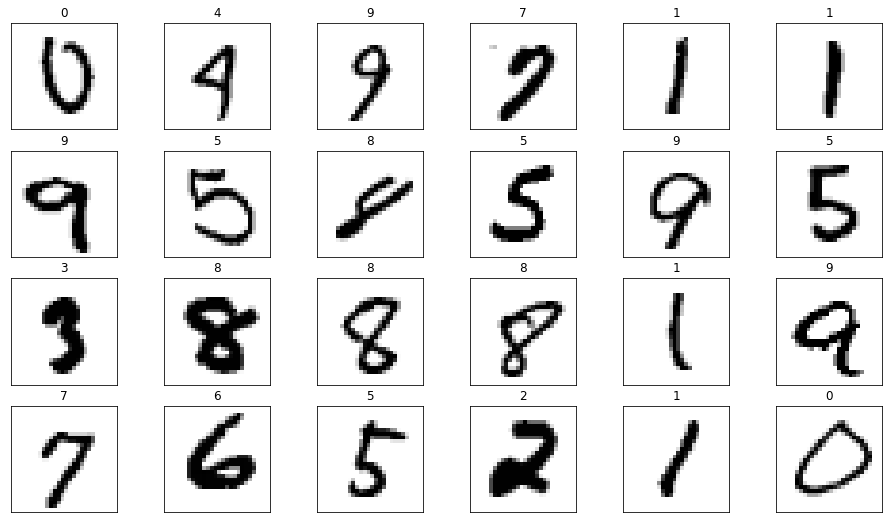

In [6]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

In [7]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [10]:
X_train = X_train.astype('float32') / 255

In [11]:
X_test = X_test.astype('float32') / 255

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
from tensorflow.keras.models import Sequential 
cnn = Sequential() 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [14]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
cnn.add(Flatten())
# cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                32010     
Total params: 106,506
Trainable params: 106,506
Non-trainable params: 0
__________________________________________________

In [17]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 99s 117ms/step - loss: 0.1724 - accuracy: 0.9493 - val_loss: 0.0514 - val_accuracy: 0.9865
Epoch 2/5
844/844 [==============================] - 99s 118ms/step - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.0494 - val_accuracy: 0.9867
Epoch 3/5
844/844 [==============================] - 99s 117ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0397 - val_accuracy: 0.9885
Epoch 4/5
844/844 [==============================] - 99s 117ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0350 - val_accuracy: 0.9903
Epoch 5/5
844/844 [==============================] - 99s 117ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0354 - val_accuracy: 0.9907


In [19]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0248 - accuracy: 0.9912


In [57]:
loss

0.03808724507689476

In [58]:
accuracy

0.9878000020980835

Removing first Dense layer reduces the CNN model accuracy because it cause the dense layer left have to learn harder from a greater amount of feature as it should be

In [20]:
#CNN with 2 Denser layer and another Dense layer with 4096 neurons
altCNN = Sequential() 
altCNN.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
altCNN.add(MaxPooling2D(pool_size=(2, 2)))
altCNN.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
altCNN.add(MaxPooling2D(pool_size=(2, 2)))
altCNN.add(Flatten())
altCNN.add(Dense(units=4096, activation='relu'))
altCNN.add(Dense(units=128, activation='relu'))
altCNN.add(Dense(units=10, activation='softmax'))

In [22]:
altCNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              13111296  
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [24]:
altCNN.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
altCNN.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 229s 271ms/step - loss: 0.1152 - accuracy: 0.9641 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 2/5
844/844 [==============================] - 224s 265ms/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0437 - val_accuracy: 0.9877
Epoch 3/5
844/844 [==============================] - 224s 265ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0343 - val_accuracy: 0.9913
Epoch 4/5
844/844 [==============================] - 223s 264ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0501 - val_accuracy: 0.9885
Epoch 5/5
844/844 [==============================] - 223s 264ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0512 - val_accuracy: 0.9878


In [27]:
loss, accuracy = altCNN.evaluate(X_test, y_test)

313/313 [==============================] - 12s 37ms/step - loss: 0.0424 - accuracy: 0.9876


In [28]:
loss

0.04244760051369667

In [29]:
accuracy

0.9876000285148621

Add one more Dense layer with 4096 neurons reduces the CNN model accuracy because it cause the model overfitting